# BÁO CÁO ĐỒ ÁN MÔN HỌC - NHẬP MÔN AI
## Nhóm 25
## Thành viên và nhiệm vụ
- Nguyễn Xuân Tùng 20215162: Thiết kế thuật toán, viết chương trình tạo giao diện để áp dụng thuật toán (áp dụng A* và DFS)
- Nguyễn Văn Đăng 20215033: Thiết kế và chỉnh sửa thuật toán (phiên bản A* tìm được nhiều mục tiêu), vá các lỗi liên quan đến giao diện
- Nguyễn Văn Thế Bách 20214993: Viết chương trình giao diện, kiểm thử và vá lỗi chương trình
- Đinh Huy Dương 20215020: Viết báo cáo, nghiên cứu thuật toán (A* và DFS) viết chương trình đánh giá hiệu năng (tạo Dataset và biểu đồ)

## Mô tả bài toán 
Bài toán máy hút bụi: Máy hút bụi sẽ tự động tìm hạt bụi trong một căn phòng và làm sạch 

## Mã nguồn ứng dụng

In [30]:
from tkinter import *
from PIL import Image, ImageTk
import random
import itertools
import heapq 
App = Tk()
App.geometry('650x600')
App.title('Vacumm simulator')
global grid, current_position, goal_position, start_position, image_id, goal_positions
start_position = (0,0) 
goal_positions = list()


img = Image.open("vacuum-cleaner-floor-svgrepo-com.png")
img = img.resize((20, 20))
photo = ImageTk.PhotoImage(img)
App.wm_iconphoto(False, photo)

def reset_goals():
    global goal_positions
    goal_positions = list()
    #goal_positions.append((len(grid)-1, len(grid)-1))
    
def reset_grid(canvas, rectangle_ids):
    global grid , image_id, goal_positions
    for i, row in enumerate(grid):
        for j, cell in enumerate(row):
            move = i * len(grid) + j
            if cell == 0:  # If the cell is not an obstacle
                if (i,j) == start_position:
                    canvas.itemconfig(rectangle_ids[move], fill="yellow")
                elif(i,j) in goal_positions:
                     canvas.itemconfig(rectangle_ids[move], fill="blue")
                else:
                    canvas.itemconfig(rectangle_ids[move], fill="#76ABAE")  # Reset the color to default

def nearest_goal(current_position, goal_positions):
    return min(goal_positions, key=lambda x: abs(x[0] - current_position[0]) + abs(x[1] - current_position[1]))

'''def a_star_search(grid, start, goal):
    rows, cols = len(grid), len(grid[0])
    path = {start: []} 
    queue = [(0, start)]  
    costs = {start: 0}  
    working_goal = goal.copy()
    print("Working: ")
    print(working_goal)

    while queue:
        cost, node = heapq.heappop(queue)

        if node in working_goal:
            working_goal.remove(node)
            print("Working: ")
            print(working_goal)
            if not working_goal:
                return path[node]
            else:
                costs = {node: 0}
                goal_near = nearest_goal(node, working_goal)
                priority = cost + abs(goal_near[0] - node[0]) + abs(goal_near[1] - node[1])
                heapq.heappush(queue, (priority, node))
                continue       
        
        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            new_x, new_y = node[0] + dx, node[1] + dy

            if 0 <= new_x < rows and 0 <= new_y < cols and grid[new_x][new_y] != 1:
                new_node = (new_x, new_y)
                new_cost = cost + 1 
                if new_node not in costs or new_cost < costs[new_node] or new_node not in path:
                    costs[new_node] = new_cost
                    goal_near = nearest_goal(new_node, working_goal)
                    print("Goal near: ", goal_near)
                    priority = new_cost + abs(goal_near[0] - new_x) + abs(goal_near[1] - new_y)
                    heapq.heappush(queue, (priority, new_node))
                    print("Priority: ", queue)
                    path[new_node] = path[node] + [new_node]
                    print("Path: ", path)

    return None '''
def a_star_search_multiple_goals(grid, start, goals):
    local_goals = goals.copy()
    local_start = start
    path = []

    while(local_goals):
        goal = nearest_goal(local_start, local_goals)
        local_goals.remove(goal)
        path += a_star_search(grid, local_start, goal)
        local_start = goal
    
    return path

def a_star_search(grid, start, goal):
    rows, cols = len(grid), len(grid[0])
    queue = [(0, start)]  
    costs = {start: 0}  
    paths = {start: []} 
    while queue:
        cost, node = heapq.heappop(queue)

        if node == goal:
            return paths[node]  

        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            new_x, new_y = node[0] + dx, node[1] + dy

            if 0 <= new_x < rows and 0 <= new_y < cols and grid[new_x][new_y] != 1:
                new_node = (new_x, new_y)
                new_cost = cost + 1 
                if new_node not in costs or new_cost < costs[new_node]:
                    costs[new_node] = new_cost
                    priority = new_cost + abs(goal[0] - new_x) + abs(goal[1] - new_y)  
                    heapq.heappush(queue, (priority, new_node))
                    paths[new_node] = paths[node] + [new_node]

    return None 

def handle_a(canvas,rectangle_ids, number):
    global current_position
    global goal_positions
    global image_id

    reset_grid(canvas, rectangle_ids)
    current_position = start_position
    
    path = a_star_search_multiple_goals(grid, current_position, goal_positions)

    if path == None:
        not_found = Label(main_frame, text="Solution not found")
        not_found.pack()  
        return 
    print("Path found:", path)
    for i, step in enumerate(path):
        if i >= 0:
            current_position = step
            move =  current_position[0]* len(grid) + current_position[1] 
            canvas.itemconfig(rectangle_ids[move], fill="yellow")
            canvas.delete(image_id)
            if(number == 8): 
                image_id = canvas.create_image(((current_position[0] + 1) * 50) -25  , ((current_position[1] + 1) * 50) - 25, image=photo)
            if(number == 4): 
                image_id = canvas.create_image(((current_position[0] + 1) * 100) -50  , ((current_position[1] + 1) * 100) - 50, image=photo)
            if(number == 16): 
                image_id = canvas.create_image(((current_position[0] + 1) * 25) - 12.5  , ((current_position[1] + 1) * 25) - 12.5, image=photo)   
            App.update()  
            App.after(100)        
    

def dfs_search(grid, current_position, goal_positions):
    working_goal = goal_positions.copy()
    rows, cols = len(grid), len(grid[0])
    visited = [[False for _ in range(cols)] for _ in range(rows)] 
    visited_nodes = [] 
    def dfs_helper(x, y):
        if x < 0 or x >= rows or y < 0 or y >= cols or visited[x][y] or grid[x][y] == 1:
            return None

        visited[x][y] = True
        visited_nodes.append((x, y))

        if (x, y) in working_goal:
            working_goal.remove((x, y))
            if not working_goal:
                return (x, y)

        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            new_x, new_y = x + dx, y + dy
            result = dfs_helper(new_x, new_y)
            if result:
                return result

        return None

    path = dfs_helper(current_position[0], current_position[1])
    print("Path found:", path)
    return visited_nodes, path 

def handle_dfs(canvas,rectangle_ids, number):
    local_current_position = start_position
    local_goal_positions = goal_positions.copy()
    global image_id
    reset_grid(canvas, rectangle_ids)
    current_position = start_position
    visited_nodes, path = dfs_search(grid, current_position, goal_positions)
    for i, step in enumerate(visited_nodes):
        if i > 0:
            current_position = step
            move =  current_position[0]* len(grid) + current_position[1] 
            canvas.itemconfig(rectangle_ids[move], fill="yellow")
            canvas.delete(image_id)
            if(number == 8): 
                image_id = canvas.create_image(((current_position[0] + 1) * 50) -25  , ((current_position[1] + 1) * 50) - 25, image=photo)
            if(number == 4): 
                image_id = canvas.create_image(((current_position[0] + 1) * 100) -50  , ((current_position[1] + 1) * 100) - 50, image=photo)
            if(number == 16): 
                image_id = canvas.create_image(((current_position[0] + 1) * 25) - 12.5  , ((current_position[1] + 1) * 25) - 12.5, image=photo)          
            App.update()  
            App.after(100) 
    if path == None:
        not_found = Label(main_frame, text="Solution not found" , bg="white")
        not_found.pack()               




def clicked(event,canvas, step):
    global goal_positions

    x = event.x // step
    y = event.y // step + 1
    number = 400 //step

    goal_position = (x,y-1)

    if goal_position in goal_positions:
        goal_positions.remove(goal_position)
        canvas.itemconfig(x*number + y, fill="#76ABAE")
    else:
        if grid[x][y-1] == 1:
            grid[x][y-1] = 0
        goal_positions.append(goal_position)
        canvas.itemconfig(x*number + y, fill = "blue")

def right_click(event,canvas, step):
    global grid
    x = event.x // step
    y = event.y // step + 1
    number = 400 // step

    if grid[x][y-1] == 1:
        grid[x][y-1] = 0
        canvas.itemconfig(x*number + y, fill="#76ABAE") 
    else:
        if (x, y-1) in goal_positions:
            goal_positions.remove((x, y))
        grid[x][y-1] = 1
        canvas.itemconfig(x*number + y, fill="#9B3922") 

def draw_grid(page, number):
    global grid, current_position, image_id, goal_positions

    pairs = []
    for i in range(number):
        pair = [random.randint(0, number-1), random.randint(0, number-1)]
        while pair in [[0, 0], [number-1, number-1]]:
            pair = [random.randint(0, number-1), random.randint(0, number-1)]
        pairs.append(pair)
    canvas = Canvas(page, width=400, height=400, bg="#76ABAE")
    step = 400  // number
    rectangle_ids = []
    grid = [[0 for _ in range(number)] for _ in range(number)]
    goal_position = (len(grid)-1, len(grid)-1)
    goal_positions.append(goal_position)
    for x in range(0,400 // step , 1):
        for y in range(0, 400 // step, 1):
            obstacle = False
            for pair in pairs:  
                if(x == pair[0] and y == pair[1]):
                    obstacle_rect = canvas.create_rectangle(x * step,y * step,x*step + step,y*step + step, fill="#9B3922")
                    rectangle_ids.append(obstacle_rect)  
                    grid[x][y] = 1
                    obstacle = True
                    break
            if(x == 0 and y == 0):
                current = canvas.create_rectangle(x * step,y * step,x*step + step,y*step + step, fill="yellow")
                current_position = (x,y)
                rectangle_ids.append(current)
            elif(x == 400 // step -1  and y == 400 // step - 1):
                goal = canvas.create_rectangle(x * step,y * step,x*step + step,y*step + step, fill="blue")
                rectangle_ids.append(goal)
            elif(obstacle == False):     
                rectangle_id =  canvas.create_rectangle(x * step,y * step,x*step + step,y*step + step)
                canvas.tag_bind(rectangle_id, "<Button-1>", lambda event: clicked(event,canvas, step))
                canvas.tag_bind(rectangle_id, "<Button-3>", lambda event: right_click(event,canvas, step))
                rectangle_ids.append(rectangle_id)
    reset_grid(canvas,rectangle_ids)             
    image_id = canvas.create_image( ((current_position[0]+1)*step) // 2,((current_position[1]+1) * step) // 2, image = photo)                
    canvas.pack()
    dfs_btn = Button(page,text="START DFS", fg="#76ABAE", font=("Bold",15), border=0 ,command=lambda:handle_dfs(canvas, rectangle_ids, number))
    dfs_btn.pack()
    a_btn = Button(page,text="START A*", fg="#76ABAE", font=("Bold",15), border=0 ,command=lambda:handle_a(canvas, rectangle_ids, number))
    a_btn.pack()


def frame_4():
    frame_4 = Frame(main_frame)
    draw_grid(frame_4,4)
    frame_4.pack(pady=10)

def frame_8():
    frame_8 = Frame(main_frame)
    draw_grid(frame_8,8)
    frame_8.pack(pady=10)


def frame_16():
    frame_16 = Frame(main_frame)
    draw_grid(frame_16,16)
    frame_16.pack(pady=10)



def hide_indicator():
    button_4_indicator.config(bg ="#31363F")
    button_8_indicator.config(bg ="#31363F")
    button_16_indicator.config(bg ="#31363F")

def delete_frame():
    for frame in main_frame.winfo_children():
        frame.destroy()


def indicate(label, page):
    hide_indicator()
    reset_goals()
    label.config(bg = "#76ABAE")
    delete_frame()
    page()

side_bar = Frame(App, bg="#31363F")
side_bar.pack(side=LEFT)
side_bar.pack_propagate(False)
side_bar.configure(width=150,height=600)



select_label = Label(side_bar, text="select size", font=("Bold",15), fg="#76ABAE", bg="#31363F")
select_label.place(x=5, y= 20)

button_4 = Button(side_bar, text="4 x 4", font=("Bold",10), fg="#76ABAE", bd=0, bg="#31363F", command=lambda:indicate(button_4_indicator, frame_4))
button_4.place(x=25, y= 50)
button_4_indicator = Label(side_bar, text="",bg="#31363F")
button_4_indicator.place(x = 5, y = 45, width=5, height=30)


button_8 = Button(side_bar, text="8 x 8", font=("Bold",10), fg="#76ABAE", bd=0, bg="#31363F", command=lambda:indicate(button_8_indicator, frame_8))
button_8.place(x=25, y= 100)
button_8_indicator = Label(side_bar, text="",bg="#31363F")
button_8_indicator.place(x = 5, y = 95, width=5, height=30)


button_16 = Button(side_bar, text="16 x 16", font=("Bold",10), fg="#76ABAE", bd=0, bg="#31363F", command=lambda:indicate(button_16_indicator, frame_16))
button_16.place(x=25, y= 150)
button_16_indicator = Label(side_bar, text="",bg="#31363F")
button_16_indicator.place(x = 5, y = 145, width=5, height=30)


main_frame = Frame(App, highlightbackground='black',highlightthickness=2, bg="#222831")
main_frame.pack(side=LEFT)
main_frame.pack_propagate(False)
main_frame.configure(width=500,height=600)


App.mainloop()

## Minh họa:
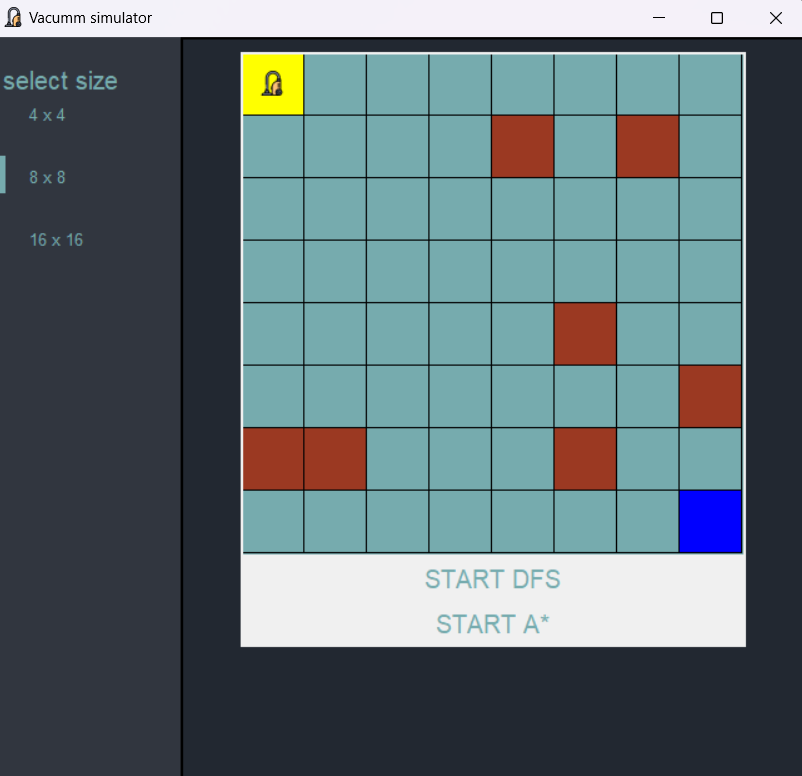

### Hướng dẫn sử dụng: 
- Người dùng chọn kích cỡ ma trận ở bên tay trái
- Click chuột phải để đặt hạt bụi (Ô màu xanh), và click chuột trái để đặt chướng ngại vật (Ô màu nâu)
- Ở dưới màn hình người dùng chọn thuật toán (A* hoặc DFS) để thực hiện hút bụi

## PHƯƠNG PHÁP VÀ ĐÁNH GIÁ HIỆU NĂNG

### MÔ HÌNH HÓA: 
- Máy sẽ làm việc trên một ma trận m x n
- Ô của ma trận mang giá trị 1 sẽ là chướng ngại vật, cái mục tiêu (hạt bụi) sẽ để trong 1 danh sách tọa độ có sẵn, tuy nhiên trong ví dụ này chúng ta sẽ đặt là "x" để dễ minh họa
- Ví dụ ma trận: Ô trái trên cùng sẽ mang tọa độ (0,0); ô phải dưới cùng sẽ mang tọa độ (3,3). 

<center>

| 0 | 0 | 0 | 0 |
| --- | --- | --- | --- |
| 0 | 1 | 1 | 0 |
| 0 | 0 | 0 | 1 |
| 1 | 1 | 0 | x |

</center>

* Chướng ngại vật ở các ô có tọa độ 
    * (1,1)
    * (1,2)
    * (2,3)
    * (3,0) 
    * (3,1)

* Hạt bụi được đặt tại ô (3,3)

- Mục tiêu bài toán: Đặt hạt bụi (goal) ở một ô, và máy hút bụi sẽ tránh chướng ngại vật và tìm đường đi đến hạt bụi
- Máy hút bụi sẽ được đặt mặc định ở ô (0,0)
- Máy hút bụi sẽ di chuyển lên, xuống, trái, phải, không đi chéo

- Máy hút bụi sẽ sử dụng thuật toán A* và DFS để tìm được đường đi

### ĐÁNH GIÁ HIỆU NĂNG

#### DATASET
##### Ta sẽ đánh giá thuật toán theo các ma trận cỡ 4x4, 8x8, 16x16, theo số bước mà thuật toán đi

In [31]:
import numpy as np
from matplotlib import pyplot as plt

def eff_test(matrices, goals):
    steps_a_star = []
    steps_dfs = []
    
    for i in range(3):
        matrix = matrices[i]
        goal = goals[i]
        
        # Test A* algorithm
        path_a_star = a_star_search_multiple_goals(matrices[i], (0,0), goals[i])
        steps_a_star.append(len(path_a_star) - 1)
        
        # Test DFS algorithm
        path_dfs = []
        step, path_dfs = dfs_search(matrices[i],(0,0), goals[i])
        steps_dfs.append(len(step))
    
    x = np.arange(3)
    width = 0.35
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, steps_a_star, width, label='A*')
    rects2 = ax.bar(x + width/2, steps_dfs, width, label='DFS')
    
    ax.set_ylabel('Steps')
    ax.set_title('Number of steps by algorithm and matrix')
    ax.set_xticks(x)
    ax.set_xticklabels(['Matrix A', 'Matrix B', 'Matrix C'])
    ax.legend()
    
    fig.tight_layout()
    plt.show()
    

#### Ma trận 4x4
- Ma trận A: 1 Goal tại (3,3)
<center>

| 0 | 1 | 0 | 0 |
| --- | --- | --- | --- |
| 0 | 1 | 0 | 0 |
| 0 | 0 | 1 | 0 |
| 1 | 0 | 0 | x |

</center>

- Ma trận B: 2 Goals tại (2,1) và (3,3)
<center>

| 0 | 0 | 0 | 1 |
| --- | --- | --- | --- |
| 0 | 1 | 1 | 0 |
| 0 | x | 1 | 0 |
| 1 | 0 | 0 | x |

</center>

- Ma trận C: 3 Goals tại (1,3), (2,0) và (3,3)   
<center>

| 0 | 0 | 0 | 1 |
| --- | --- | --- | --- |
| 0 | 1 | 0 | x |
| x | 0 | 1 | 0 |
| 1 | 0 | 0 | x |

</center>

#### BIỂU ĐỒ HIỆU NĂNG

Path found: (3, 3)
Path found: (3, 3)
Path found: (1, 3)


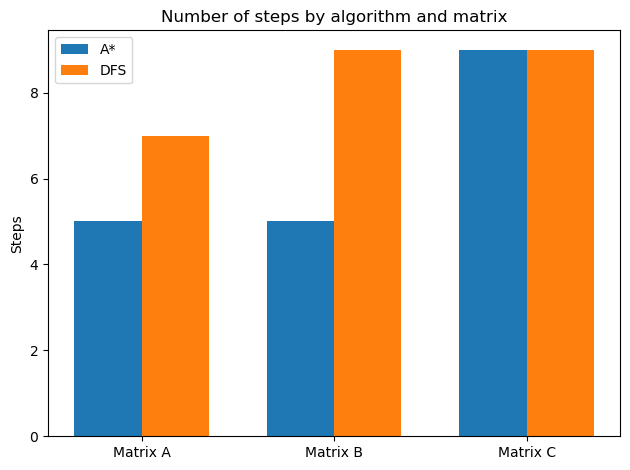

In [32]:
matrix_a = [
    [0, 1, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 0, 0, 0]
]
goal1 = [(3,3)]

matrix_b = [
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 0, 1, 0],
    [1, 0, 0, 0]
]
goal2 = [(2,1), (3,3)]

matrix_c = [
    [0, 1, 0, 1],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 0, 0, 0]
]
goal3 = [(1,3), (2,0), (3,3)]


matrices = [matrix_a, matrix_b, matrix_c]
goals = [goal1, goal2, goal3]

eff_test(matrices, goals)



#### Ma trận cỡ 8x8  

- Ma trận A: Hạt bụi ở (7,7), (6,4), (3,5), (4,5)
<center>

| 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 |
|---|---|---|---|---|---|---|---|
| 0 | 1 | 0 | 1 | 0 | 1 | 0 | 0 |
| 0 | 1 | 0 | 0 | 0 | 1 | 0 | 0 |
| 0 | 0 | 0 | 1 | 0 | x | 1 | 0 |
| 1 | 1 | 0 | 1 | 0 | x | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 |
| 0 | 1 | 1 | 1 | x | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 1 | 1 | x |

</center>

</br>
- Ma trận B: Hạt bụi ở (7,7), (3,2), (1,2), (5,4), (6,7)
<center>

| 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 |
|---|---|---|---|---|---|---|---|
| 0 | 1 | x | 1 | 0 | 1 | 0 | 0 |
| 0 | 1 | 0 | 0 | 0 | 1 | 1 | 0 |
| 0 | 0 | x | 1 | 0 | 0 | 0 | 0 |
| 1 | 1 | 0 | 1 | 0 | 1 | 0 | 0 |
| 0 | 0 | 0 | 0 | x | 0 | 0 | 0 |
| 0 | 1 | 1 | 1 | 0 | 0 | 0 | x |
| 0 | 0 | 0 | 0 | 0 | 1 | 1 | x |

</center>

</br>
- Ma trận C: Hạt bụi ở (7,7), (4,7), (3,0), (6,2), (0,6), (7,2)
<center>

| 0 | 0 | 0 | 0 | 1 | 0 | x | 0 |
|---|---|---|---|---|---|---|---|
| 0 | 1 | 0 | 1 | 0 | 1 | 0 | 0 |
| 0 | 1 | 0 | 0 | 0 | 0 | 1 | 0 |
| x | 0 | 0 | 1 | 0 | 0 | 0 | 0 |
| 1 | 1 | 0 | 1 | 0 | 1 | 0 | x |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 1 | x | 1 | 0 | 0 | 0 | 0 |
| 0 | 0 | x | 0 | 0 | 1 | 1 | x |

</center>

Path found: (6, 4)
Path found: (3, 2)
Path found: (0, 6)


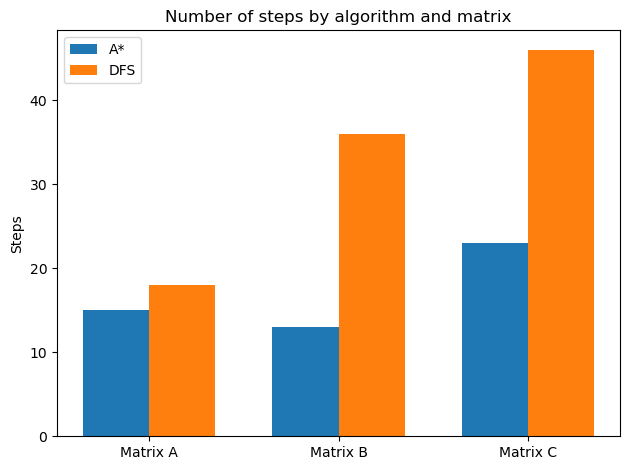

In [34]:
matrix_a = [
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 1, 0],
    [1, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0]
]
goal1 = [(7,7), (6,4), (3,5), (4,5)]

matrix_b = [
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0]
]
goal2 = [(7,7), (3,2), (1,2), (5,4), (6,7)]

matrix_c = [
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0]
]
goal3 = [(7,7), (4,7), (3,0), (6,2), (0,6), (7,2)]

matrices = [matrix_a,matrix_b, matrix_c]
goals = [goal1, goal2, goal3]

eff_test(matrices, goals)

## KẾT LUẬN
Dựa theo các biểu đồ, ta dễ dàng nhận thấy thuật toán A* có số bước đi nhỏ hơn hoặc bằng so với thuật toán DFS. Điều này là hiển nhiên, khi thuật toán DFS sẽ duyệt toàn bộ mà không tính toán gì đến việc khoảng cách của đường đi có gần với mục tiêu hay không. Tuy nhiên điều này không có nghĩa là thuật toán hoàn toàn vô dụng. Ta có thể xét đến trường hợp mà môi trường của chúng ta là không xác định (không biết ma trận tọa độ), bắt buộc chúng ta phải sử dụng việc đi và thử, thì DFS sẽ được sử dụng ở đây.